# Runga-Kutta and the Finite Difference Method

## Place Library Imports Here

In [1]:
import math
import cmath
import numpy as np
import time
import matplotlib.pyplot as plt
import random
import scipy.sparse as hungry
from mpl_toolkits.mplot3d import Axes3D
from scipy.sparse.linalg import eigsh

## Basic Midpoint RK and RK4

### Midpoint RK

<font color = blue>
Construct a function that implements the midpoint RK method to solve the first order differential equation

$$
\frac{dx}{dt} = F(x, t)
$$

It should take as inputs the function $F$ (assumed to be of two variables), the initial value $x_0$, the step size $\Delta t$, and the total number of steps $N$.  It should output two lists: a list of times $\{t_n\}$ and a list of positions $\{x_n\}$, each with $M+1$ elements (starting from $0$ and $x_0$ respectively.)

In [2]:
def midpoint_RK_fire(F,x_not,dt,N):
    time_vals = np.arange(0,(N+1)*dt,dt)
    #make array, change values later for the sake of time savings
    f_vals = np.array([x_not]*(N+1))
    for i in range(N):
        k1 = dt * F(f_vals[i],time_vals[i])
        k2 = dt * F(f_vals[i]+(k1/2),time_vals[i]+(dt/2))
        f_vals[i+1] = f_vals[i] + k2
    if isinstance(x_not,np.ndarray):
        #sepparating out position and velocity for easy graphing
        x = np.array([f_vals[i][0] for i in range(len(f_vals))])
        v = np.array([f_vals[i][1] for i in range(len(f_vals))])
        return np.array([time_vals, x, v])
    else:
        return np.array([time_vals, f_vals])

### RK4

<font color = blue>
Now construct a function to solve the same type of problem, with the same inputs and outputs, but using the Runga-Kutta-4 algorithm.

In [3]:
def RK_four(F,x_not,dt,N):
    time_vals = np.arange(0,(N+1)*dt,dt)
    #make array, change values later for the sake of time savings
    f_vals = np.array([x_not]*(N+1))
    for i in range(N):
        k1 = dt * F(f_vals[i],time_vals[i])
        k2 = dt * F(f_vals[i]+(k1/2),time_vals[i]+(dt/2))
        k3 = dt * F(f_vals[i]+(k2/2),time_vals[i]+(dt/2))
        k4 = dt * F(f_vals[i]+k3,time_vals[i]+dt)
        f_vals[i+1] = f_vals[i] + ( k1 + 2*k2 + 2*k3 + k4)/6
    return time_vals, f_vals

### Differential Equations

<font color = blue>
This isn't a computational problem, but prepatory work to establish exact solutions to a set of three differential equations (to compare with numerical work).  What should appear in the notebook is the worked out solution (that is, do it by hand and show your work here.)

a) 

$$
\frac{df}{dx} = x^{10} - 5x^2, \hspace{.75in} f(0) = 1
$$

$$ \int df = \int (x^{10} - 5x^2) dx $$\
$$ f(x) = \frac{x^{11}}{11} - \frac{5x^3}{3} + C$$\
$$ f(0) = \frac{(0)^{11}}{11} - \frac{5(0)^3}{3} + C = 1; \; \; $$\
$$ f(x) = \frac{x^{11}}{11} - \frac{5x^3}{3} + 1$$

<font color = blue>
b)

$$
\frac{df}{dx} = -xf, \hspace{.75in} f(0) = 1
$$

$$ \int \frac{df}{f} \; =\; -\int x dx$$\
$$ ln(f) = \frac{-x^2}{2} + C$$\
$$ f(x) = e^{\frac{-x^2}{2} + C} = Ae^{\frac{-x^2}{2}}$$\
$$ f(0) = Ae^{\frac{-(0)^2}{2}} =0; A=1$$\
$$ f(x) = e^{\frac{-x^2}{2}} $$

<font color = blue>
c)

$$
\frac{d^2f}{dx^2} = -29f - 4\frac{df}{dx}, \hspace{.75in} f(0) = 1, \hspace{.75in} f'(0) = 0
$$

Anzatz: $f(x) = Ae^{\lambda x}$, with $f(o) = Ae^0$, meaning A=0
$$ \frac{d^2f}{dx^2} = \lambda^2f(x) \; \; : \frac{df}{dx} = \lambda e^{\lambda x} $$\
$$ \lambda^2f(x) = -29e^{\lambda x} - 4\lambda e^{\lambda x} \; \; \; \; 0 = \lambda^2 + 4\lambda + 29 $$\
 We set $ 2\beta = 4$, and $\omega^2 = 29$, where $\lambda = -\beta \pm \sqrt{\beta^2 - \omega^2} = -2 \pm 5i$
$$ f(x) = e^{-2x \pm 5i x} = e^{-2x}e^{\pm 5i x} $$\
$$ f(x)= e^{-2x}\big[ Cos(5x) + iSin(5x) \big] or = e^{-2x}\big[ Cos(-5x) + iSin(-5x) \big] $$

### Testing the RK Functions

<font color = blue>
Use both the midpoint and RK4 algorithms to solve each of the differential equations above, in the region $x \in [0, 1]$, with $\Delta x = 0.001$.  In each case, calulate (and plot) the residuals with respect to the exact result.  Identify features of these graphs.  For added insight, look at these graphs with a variety of "plot range" choices.

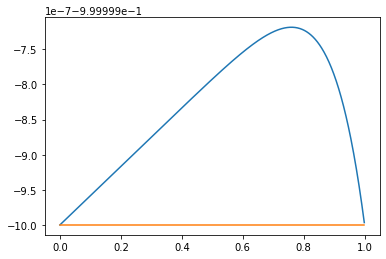

In [4]:
dx=0.001
N=int(1/dx)

def analytical1(x):
    return x**11/11 - 5*x**3/3 + 1

def test1(f,x):
    return x**10 - 5*x**2

ans1 = np.array(midpoint_RK_fire(test1,0.0,dx,N-1))
ans2 = RK_four(test1,0.0,dx,N-1)
time=np.array(np.arange(0,N*dx,dx))
analyticalData = np.array([analytical1(l) for l in time])

#Blue data is the normal midpoint RK data's difference from the analytical
plt.plot(ans1[0],ans1[1]-analyticalData)
#Orange data is the RK4 data's difference from the analytical
plt.plot(ans2[0],ans2[1]-analyticalData)

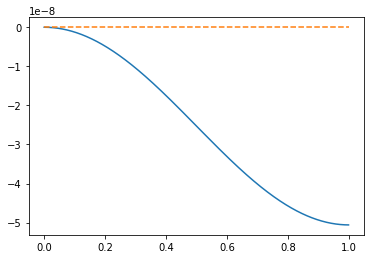

In [5]:
def analytical2(x):
    return math.exp(-x**2/2)

def test2(f,x):
    return -x*f

ans1 = np.array(midpoint_RK_fire(test2,1.0,dx,N-1))
ans2 = RK_four(test2,1.0,dx,N-1)
time=np.array(np.arange(0,N*dx,dx))
analyticalData = np.array([analytical2(l) for l in time])

#Blue data is the normal midpoint RK data's difference from the analytical
plt.plot(ans1[0],ans1[1]-analyticalData)
#Orange data is the RK4 data's difference from the analytical
plt.plot(ans2[0],ans2[1]-analyticalData,linestyle='--')

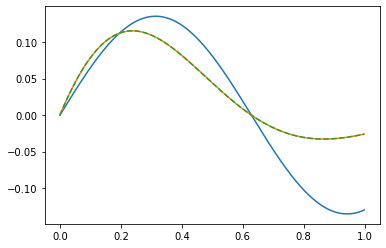

In [6]:
def analytical3(x):
    return math.exp(-2)*(math.sin(5*x)) #+ cmath.imag*math.cos(5*x))

#f takes a 1x2 array for f
def test3(f,x):
    return np.array([f[1],-29*f[0] - 4*f[1]])

init = np.array([0.0,1.0])
#ans = midpoint_RK_fire(test3,init,dx,N-1)


ans1 = midpoint_RK_fire(test3,init,dx,N-1)
ans2 = RK_four(test3,init,dx,N-1)
x2 = np.array([i[0] for i in ans2[1]])

time = np.array(np.arange(0,N*dx,dx))
analyticalData = np.array([analytical3(l) for l in time])

#Blue data is the normal midpoint RK data's difference from the analytical
plt.plot(time,analyticalData)
plt.plot(ans1[0],ans1[1])
#Orange data is the RK4 data's difference from the analytical
plt.plot(ans2[0],x2,linestyle='--')

seems like my function operates, but my analytical model is off. I plotted the analtical vs the model, instead of the difference of errors to find this problem.

## The Lorentz Force Law

<font color = blue>
We are interested in analyzing the motions of particles near a line that carries both charge and current.  We know that in dimensionless form and in Cartesian coordinates, Newton's second law and the Lorentz force law gives us

$$
\ddot{x} = \frac{x(1 - \kappa\dot{z})}{x^2 + y^2}, \hspace{.75in} \ddot{y} = \frac{y(1 - \kappa\dot{z})}{x^2 + y^2}, \hspace{.75in} \ddot{z} = \frac{\kappa(x\dot{x} + y\dot{y})}{x^2 + y^2}
$$

where $\kappa$ is a parameter that controls the relative strength of the magnetic force as compared to the electric force.

### Trajectory Function

<font color = blue>
First, create a function that takes as its inputs a set of initial conditions (an array of six numbers $[x_0, y_0, z_0, v_{x0}, v_{y0}, v_{z0}]$), the values of $\Delta t$ and $N$, and the parameter $\kappa$.  It should use the RK4 code your wrote earlier and output simply the positions of the particle, as three arrays $[x_n]$, $[y_n]$, and $[z_n]$.

In [7]:
#takes a 1x6 list of initial conditions and a 1x2 list of coordinates (x,y)
def kappa(k):
    def xYZCoords(f,t):
        x = f[0]
        y = f[1]
        return np.array([f[3],f[4],f[5],(x*(1-k*f[5]))/(x**2 + y**2),(y*(1-k*f[5]))/(x**2 + y**2),(k*(x*f[3]+y*f[4]))/(x**2 + y**2)])
    return xYZCoords

#define one trajrectory of a particle
def traj(init_Array,dt,N,K):
    kap = kappa(K)
    coords = RK_four(kap,init_Array,dt,N)
    X = np.array([i[0] for i in coords[1]])
    Y = np.array([i[1] for i in coords[1]])
    Z = np.array([i[2] for i in coords[1]])
    return np.array([X, Y, Z])

### * Particle Trajectories: $\kappa = 0$

<font color = blue>
Now, use this module to create 20 different trajectories, each with $\kappa = 0$, with initial conditions where each element in the list of six initial values is a random real number in the range $[-1, 1]$.  Set $\Delta t = .001$ and $N = 10000$. Display these trajectories together on a 3-dimensional graph.  (To do this, you will need to make use of the library mpl_toolkits.mplot3d.)

In order to help make sense of your image, add a solid, thick black line where the line of charge is, at $x = y = 0$

In [8]:
nt=20

#fire several particles
def shoot(number_of_trajectories, k=0):
    dt=0.001
    N=10000
    trajecs = np.array(np.array([[[1.0]*(N+1),[2.0]*(N+1),[3.0]*(N+1)]]*number_of_trajectories))
    time = np.arange(0,(N+1)*dt,dt)
    for i in range(number_of_trajectories):
        #making the new initial value array
        random_coords = np.array([2*random.random()-1 for i in range(6)])
        trajecs[i] = traj(random_coords,dt,N,k)
    return time,trajecs

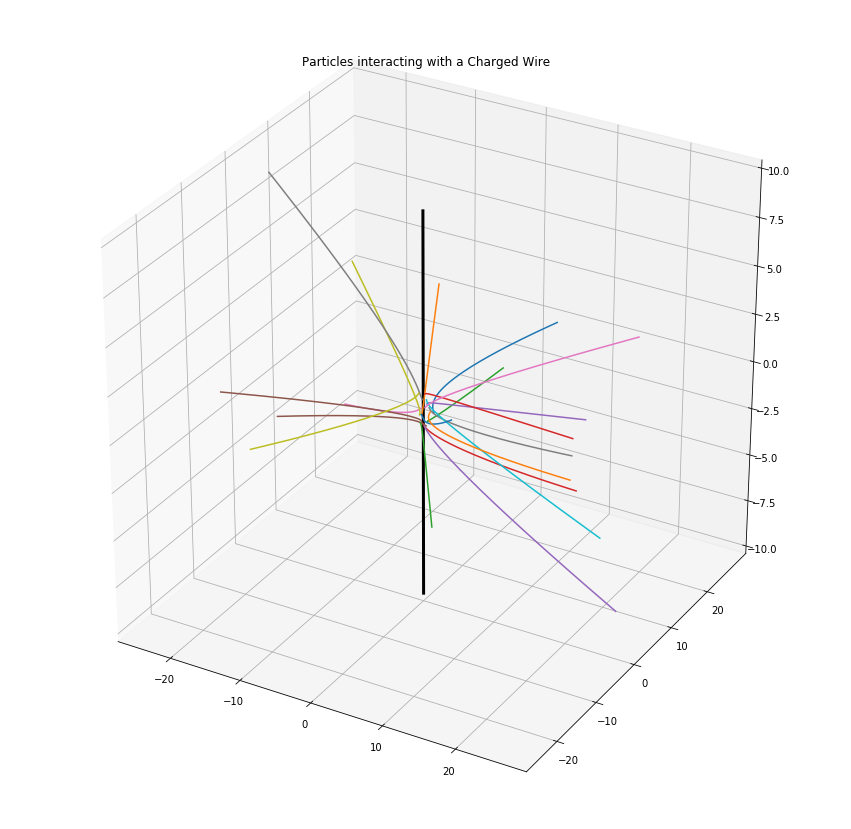

In [9]:
data=shoot(nt)
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
#the wire represented by a thick black line
ax.plot([0]*100,[0]*100,np.linspace(-10, 10, 100),color='black',linewidth=3.0)
for i in range(1,nt):
    Z=data[1][i][2]
    X=data[1][i][0]
    Y=data[1][i][1]
    ax.plot(X,Y,Z)
plt.title('Particles interacting with a Charged Wire')
plt.show()

This makes sense- with only a charge, the cable would repel all the particles in the system radially. 

### * Particle Trjaectories: $\kappa = 1$

<font color = blue>
Now repeat the exercise with $\kappa = 1$.

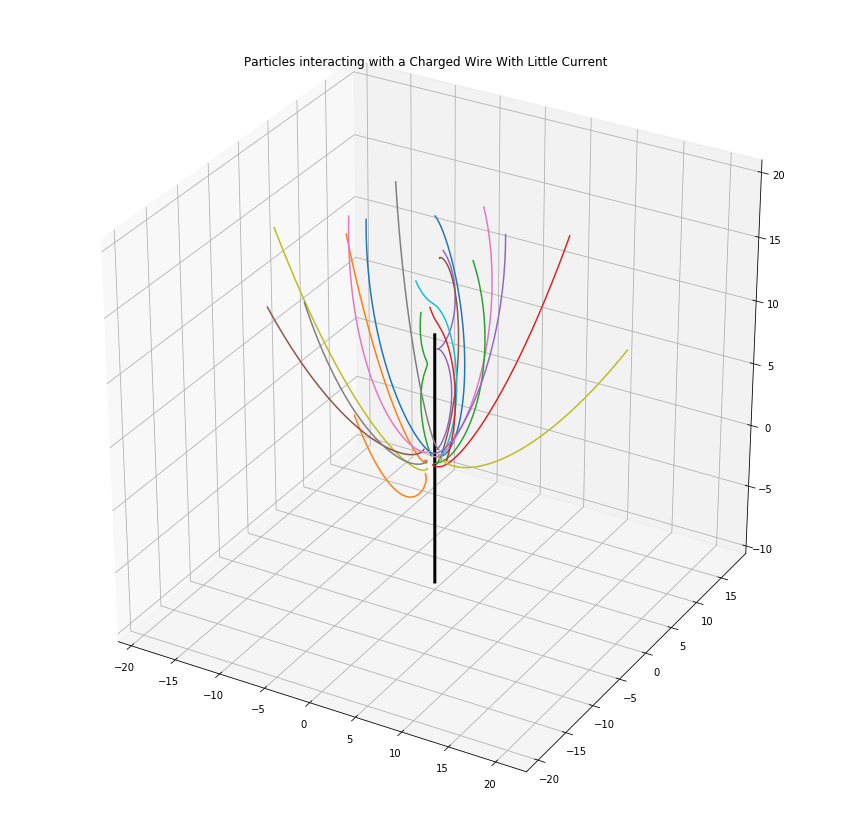

In [10]:
data=shoot(nt,1)
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
#the wire represented by a black line
ax.plot([0]*100,[0]*100,np.linspace(-10, 10, 100),color='black',linewidth=3.0)
for i in range(1,nt):
    Z=data[1][i][2]
    X=data[1][i][0]
    Y=data[1][i][1]
    ax.plot(X,Y,Z)  
plt.title('Particles interacting with a Charged Wire With Little Current')
plt.show()

This is a system with the cable containing a charge and a weak current, producing a magnetic field that starts to oppose the repelling the electric field. Visible here is a critical point in many particle's paths where either their velocity is sufficient to escape the magnetic field based on their initial location and fly away, or it is not and the particle starts rotating the coil.

### * Particle Trajectories: $\kappa = 20$

<font color = blue>
Finally, repeat the process with $\kappa = 20$.  (Note that without redoing the problem from the beginning and choosing a different non-dimensionalization, we cannot actually turn off the electric force.  Instead, we are turning up the magnetic force to the point where it should dominate the behavior.)

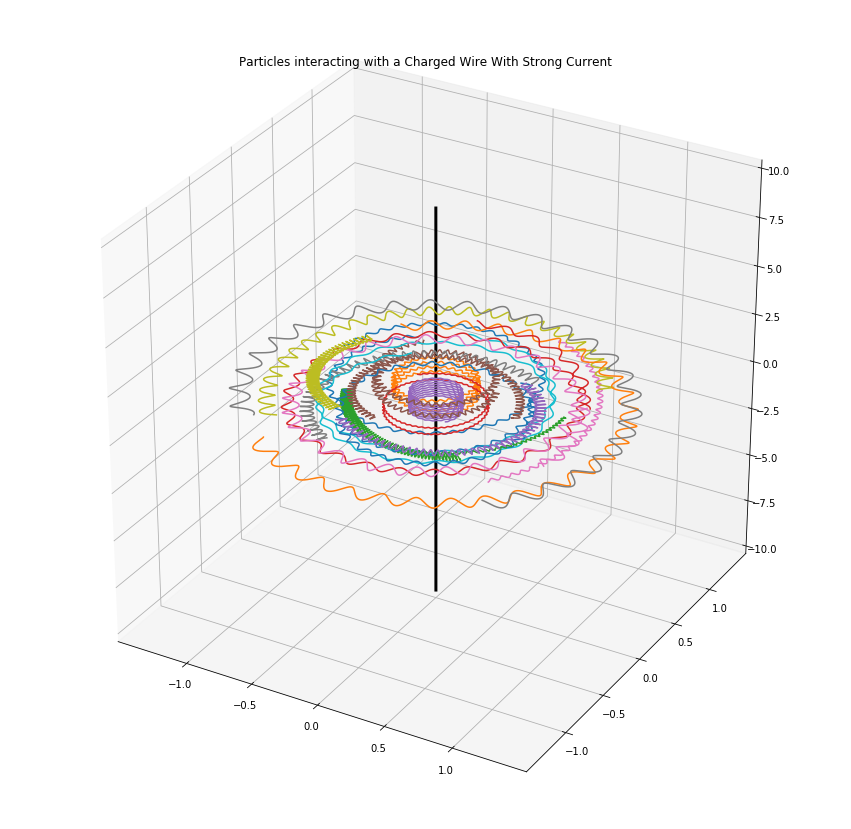

In [11]:
data=shoot(nt,20)
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
#the wire represented by a black line
ax.plot([0]*100,[0]*100,np.linspace(-10, 10, 100),color='black',linewidth=3.0)
for i in range(1,nt):
    Z=data[1][i][2]
    X=data[1][i][0]
    Y=data[1][i][1]
    ax.plot(X,Y,Z)  
plt.title('Particles interacting with a Charged Wire With Strong Current')
plt.show()

This is what to expect when the magnetic field dominates the electric field, the particles orbiting the wire and spinning around the magnetic field lines, corkscrewing aroung the wire.

## A Generic Finite Difference Function

<font color = blue>
We are interested in solving the general equation type

$$
A(x)u'' + B(x)u' + C(x)u = \lambda u
$$

subject to the boundary conditions

$$
u(0) = u(x_{\infty}) = 0
$$

(by which we mean that we want to find both the eigenvalue $\lambda$ and the eigenfunction $u(x)$.)  The basic approach used today will be to transform this equation into a matrix equation in the form

$$
\mathbb{M}\vec{u} = \lambda\vec{u}
$$

and the focus will be on generating the matrix $\mathbb{M}$, which we can then use existing python libraries to analyze.

### A Matrix Generating Function

<font color = blue>
Construct a function that takes as inputs the three functions $A(x)$, $B(x)$, and $C(x)$, along with $N$, the total size-length of the matrix and $x_{\infty}$ the value of "numerical infinity", and outputs the matrix $\mathbb{M}$ (as an array.)  Test your matrix generator with $A = B = C = 1$, $x_{\infty} = 1$, and $N = 5$, and show the result.  Confirm that the entries to the matrix are correct.

In [12]:
def matrix(A,B,C,N,x_inf):
    #x_inf is the element corresponding with N+1, this takes that into account while calculating dx
    dx = x_inf/(N+1)
    filled_matrix=np.array([[0.0]*N]*N)
    #iterate through each row and column, the value of x_j is dx times the incriment, which is j, where i is
    # the column number and the rows are summed to make the values U_j, which are incrimenting time.
    for j in range(N):
        for i in range(N):
            x_j = dx*j
            if i == j+1:
                filled_matrix[j][i] = A(x_j)/dx**2 + B(x_j)/(2*dx)
            elif i == j-1:
                filled_matrix[j][i] = A(x_j)/dx**2 - B(x_j)/(2*dx)
            elif i==j:
                filled_matrix[j][i] = C(x_j) - 2*A(x_j)/dx**2
    return filled_matrix

#sample functions all returning 1
def a(x):
    return 1
def b(x):
    return 1
def c(x):
    return 1

print(matrix(a,b,c,5,1))

[[-71.  39.   0.   0.   0.]
 [ 33. -71.  39.   0.   0.]
 [  0.  33. -71.  39.   0.]
 [  0.   0.  33. -71.  39.]
 [  0.   0.   0.  33. -71.]]


### A Second Matrix Generating Function

<font color = blue>
There are many numerical methods that find the eigenvalues and eigenvectors of a matrix, but they are definitely not all created equal.  Even though we aren't learning the algorithms behind these methods, it is still useful to consider some of their differences.

There are a set of algorithms specifically designed to work on matrices which are "sparse", meaning that most of the elements in them are zero.  However, in order to use these algorithms, we have to create and store the matrix in a way other than the standard numpy array.  What we want to do here is write a second function for creating a matrix, but this time store it as a "sparse" matrix type.  

To do this you will need to use the library scipy.sparse.  There is more than one sparse matrix type (the differences are in how the data is stored in your computer), but the easiest one to create is the "coo" type, so you will need to use the function coo_matrix in the scipy.sparse library.  

Once you have your function for creating the matrix, you can take its output and convert it into a standard array using .toarray().  (This is helpful for making sure this code produces the same matrix you've just confirmed is correct in the previous code.)

In [13]:
#finding an error
testarray = np.array([1,2,3,4,5,6,7])
print(testarray)
testarray[6:8]=1
print(testarray)

[1 2 3 4 5 6 7]
[1 2 3 4 5 6 1]


In [14]:
#just testing this
#print(hungry.coo_matrix((np.array([2,2,3,2]),(np.array([1,2,3,4]),np.array([1,2,3,4]))),shape=(5,5)).toarray())

def sparse_matrix(A,B,C,N,x_inf):
    dx = x_inf/(N+1)
    j_array = np.array([0.]*(3*N-2), dtype=float)
    i_array = np.array([0.]*(3*N-2), dtype=float)
    data = np.array([0.]*(3*N-2), dtype=float)
    #for indicies of j,i, make lists containing the values of indicies and data that aren't zero in the array.
    for n in range(N):
        if n == 0:
            x_j = n*dx
            j_array[3*n:3*n+2] = n,n
            i_array[3*n:3*n+2] = n,n+1
            data[3*n:3*n+2] = C(x_j) - 2*A(x_j)/dx**2, A(x_j)/dx**2 + B(x_j)/(2*dx)
        elif n==N-1:
            x_j = n*dx
            j_array[-3:-1] = n,n
            i_array[-3:-1] = n-1,n
            data[-3:-1] = A(x_j)/dx**2 - B(x_j)/(2*dx), C(x_j) - 2*A(x_j)/dx**2
            
            #a bad fix to the number on the second to last row, Nth column not being filled
            j_array[-1] = n-1
            i_array[-1] = n
            data[-1] = A(x_j-dx)/dx**2 + B(x_j-dx)/(2*dx)
        else: 
            x_j = dx*n
            j_array[3*n-1:3*n+2] = n,n,n
            i_array[3*n-1:3*n+2] = n-1,n,n+1
            data[3*n-1:3*n+2] = A(x_j)/dx**2 - B(x_j)/(2*dx) , C(x_j) - 2*A(x_j)/dx**2, A(x_j)/dx**2 + B(x_j)/(2*dx)
    
    
    data[-3:-1] = A(x_j)/dx**2 - B(x_j)/(2*dx), C(x_j) - 2*A(x_j)/dx**2
    
    filled_matrix=hungry.coo_matrix((data,(j_array,i_array)),shape=(N, N))
    
    return filled_matrix
    

print(sparse_matrix(a,b,c,5,1).toarray())

[[-71.  39.   0.   0.   0.]
 [ 33. -71.  39.   0.   0.]
 [  0.  33. -71.  39.   0.]
 [  0.   0.  33. -71.  39.]
 [  0.   0.   0.  33. -71.]]


### Comparing Linear Algebra Packages

<font color = blue>
Here, we will compare the efficiency of a method which uses sparse techniques with one that doesn't.  We will use the infinite square well system as an example, where

$$
A(x) = -1, \hspace{.75in} B(x) = C(x) = 0
$$

and

$$
x_{\infty} = 1
$$

For your standard numpy array matrix, use the function numpy.linalg.eigh.  For your sparse coo-type matrix use the function scipy.sparse.linalg.eigsh.  (Note that both of these functions assume the matrix you are providing is Hermetian, which when finding the energy eigenstates in quantum mechanics you always have.)

One thing to be aware of is that the "sparse" function is designed to generate only a subset of the total eigenvalues and eigenvectors (specified by the parameter $k$, which here we will set to 1.)  Furthermore, they are naturally ordered from largest magnitudes of eigenvalues to smallest.  We are more interested in the smallest magnitude eigenvalues, which we can get out by setting the parameter "sigma = 0".  


Using each of these two functions, determine the time required to compute the first eigenvalue/eigenvector for N in the range $[10, 1000]$, in steps of $10$.  Plot these two sets of times together on the same graph, and discuss which method is more efficient.


In [15]:
k = 1
x_inf = 1
sta = 10
sto = 1000
ste = 10

def A(x):
    return -1

def B(x):
    return 0

def C(x):
    return 0

#finding times to produce the eigenvalues of an N x N matrix using a full matrix
def long_timing(N):
    time1 = time.time()
    np.linalg.eigh(matrix(A,B,C,N,x_inf))
    time2=time.time()
    return time2-time1
    
#finding times to produce the eigenvalues of an N x N matrix using a sparce matrix datatype
def short_timing(N):
    time1=time.time()
    eigsh(sparse_matrix(A,B,C,N,x_inf), 1, sigma = 0)
    time2=time.time()
    return time2-time1

#time each function taking the inputs of a range function
def compare(start,stop,step):
    n_vals = np.array(range(start,stop,step))
    data = np.array([np.array([0.0]*len(n_vals)),np.array([0.0]*len(n_vals))])
    for n in range(len(n_vals)):
        data[1][n]=long_timing(n_vals[n])
        data[0][n]=short_timing(n_vals[n])
    return data
    
#testing that they're producing similar results before I take the dive
print(eigsh(sparse_matrix(A,B,C,5,x_inf), 1, sigma = 0))
print([i[0] for i in np.linalg.eigh(matrix(A,B,C,5,x_inf))])

#Plotting Data
plt.plot(np.array(range(sta,sto,ste)),compare(sta,sto,ste)[0],color='red')
plt.plot(np.array(range(sta,sto,ste)),compare(sta,sto,ste)[1],color='green')
#labelling Plot
plt.legend(['Sparce Matrix','Full matrix'])
plt.title('Time to produce N x N Eigenvale Matrix')
plt.ylabel('Computation Time (s)')
plt.xlabel('Size of N x N Matrix Produced')
plt.show()

(array([9.64617093]), array([[0.28867513],
       [0.5       ],
       [0.57735027],
       [0.5       ],
       [0.28867513]]))
[9.646170927520398, array([-0.28867513, -0.5       ,  0.57735027, -0.5       ,  0.28867513])]


C:\Users\relan\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:296: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


AttributeError: 'numpy.ndarray' object has no attribute 'time'

In [ ]:
#these tested and found that floats are meanies and need to appear literally everywhere for things to function. Makes sense.
def a(x):
    return 1.0
def b(x):
    return 1.0
def c(x):
    return 1.0


In [ ]:
tester = sparse_matrix(a,b,c,5,1)

In [ ]:
tester.toarray()

In [ ]:
eigsh(tester, 1, sigma = 0)

## Hydrogen

<font color = blue>
Now we want to analyze the Hydrogen atom, where we are trying to solve the equation (in dimensionless form, as usual)

$$
-u'' + \frac{\ell(\ell+1)}{r^2}u - \frac{2}{r}u + u = \hat{E}u
$$

Remember that here, length is measured in units of the Bohr radius, and energy is measured in units of the Rydberg energy, but with an upward shift of $+1$ so that

$$
\tilde{E} = \hat{E} - 1
$$

The value $\ell$ is the quantum number associated with the magnitude of angular momentum.  With this non-dimensionalization, the energy spectrum should be

$$
\tilde{E}_n = -\frac{1}{n^2}, \hspace{.5in} \mbox{or} \hspace{.5in} \hat{E}_n = 1 - \frac{1}{n^2}.
$$

### Preliminaries

<font color = blue>
First create a function that takes as input the value of $\ell$ as well as the choice of "numerical infinity" and the value of $N$, and outputs the appropriate matrix.

In [ ]:
r=1

def aFunct(x):
    return -1

def bFunct(x):
    return 0

def input_lr_values(l,r):
    def cFunct(x):
        return l*(l+1)/r**2 - 2/r + 1
    return cFunct

def hyd(l,x_inf,N):
    C = input_lr_values(l,r)
    return sparse_matrix(aFunct,bFunct,C,N,x_inf)

#outputs the eivenvalue, followed by several eigenvectors.
print(eigsh(hyd(0.0,1.0,5), 1, sigma = 0))

### * Eigenvalues

<font color = blue>
Now, use your function to genererate the energy spectrum of the lowest ten energies of hydrogen, with $\ell = 0$. Create arrays with entries $[n]$ and $[\tilde{E}_n]$, and plot this together with a curve showing the theoretical spectrum.  (Don't forget to shift the energies back from $\hat{E}$ to $\tilde{E}$!)  For this exercise, use $x_{\infty} = 1000$ and $N = 100000$.

In [ ]:
x_inf = 1000
N=100000
l=0.0
n_r = 1 
    
#corresponding to an Nr of 1 and an l value of 0
def theoretical_first_energy_state(l):
    return 1-1/(n_r + l)**2

data0 = eigsh(hyd(l,x_inf,N), 10, sigma = 0)
print(data0)

#eigen values found
plt.plot(np.array([0]*10),data0[0], marker='.',linestyle ='none')
#theoretical values
plt.plot(np.array([0]*10),np.array([theoretical_first_energy_state(l) for i in range(10)]),marker='o')
plt.legend(['calculated energy states','Analytical Energy States'])
plt.title('Value of Angular Momentum Quantum Number')
plt.ylabel('Value of Energy')
plt.xlabel('l=0 energy states')
plt.show()

<font color = blue>
Then, use your function to also generate lists of energies for $\ell = 1$ and $\ell = 2$.  (Use the same $x_{\infty}$ and $N$ values.)

One of the most interesting physical phenomena in this system is "degeneracy": there are multiple different values of $\ell$ which lead to the same energy for a generate energy level in this system.  In order to demonstrate this, create a graph showing all three values of $\ell$.  Put energy on the vertical axis, and $\ell$-value on the horizontal axis.  In order to emphasize the degeneracy of the spectrum, add horizontal lines at each energy level.

In [ ]:
l=1.0
n_r = 1 
data1 = eigsh(hyd(l,x_inf,N), 10, sigma = 0)

l=2.0
n_r = 1 
data2 = eigsh(hyd(l,x_inf,N), 10, sigma = 0)


In [ ]:
plt.figure(figsize=(1,10))
#eigen values found
#plt.plot(np.array([0]*10),data[0], marker='.',linestyle ='none')
#theoretical values
plt.plot(np.array([0]*10),np.array([theoretical_first_energy_state(0) for i in range(10)]),marker='o')


#eigen values found
#plt.plot(np.array([1]*10),data1[0], marker='.',linestyle ='none')
#theoretical values
plt.plot(np.array([1]*10),np.array([theoretical_first_energy_state(1.0) for i in range(10)]),marker='o')

#eigen values found
#plt.plot(np.array([2]*10),data2[0], marker='.',linestyle ='none')
#theoretical values
plt.plot(np.array([2]*10),np.array([theoretical_first_energy_state(2.0) for i in range(10)]),marker='o')

plt.title('Value of Angular Momentum Quantum Number')
plt.ylabel('Value of Energy')
plt.xlabel('l=0 energy states')
plt.show()

My eigenvectors are off; I'm not even correcting by subtracting the 1 and I'm at 5 for a third energy state, and see no degeneracy. I know what it should look like, I think its my use of Eighs that is giving me trouble- I'm not sure if I'm using it ina  way that gives me the information I need.

### * Eigenvectors and Analytic Results

<font color = blue>
Now let's make some comparisons between the eigenvectors generated numerically and the known analytic functions for the radial wavefunction $R(r)$.  Use the "eigsh" function to generate the eigenvectors associated with the sets of quantum numbers $(n = 1, \ell = 0)$, $(n - 2, \ell = 0)$, and $(n = 2, \ell = 1)$.  For this, use $x_{\infty} = 1000$ and $N = 100000$.  Convert these lists into discrete approximations of the radial wavefunction

$$
R(r) = \frac{u(r)}{r}
$$

In addition, create a list of $r$-coordinates $[r_n]$.  Then plot each, together with its analytic, known solution:

$$
n = 1, \ell = 0: \hspace{.5in} R(r) \propto e^{-r}
$$

$$
n = 2, \ell = 0: \hspace{.5in} R(r) \propto \left(1 - \frac{r}{2}\right)e^{-r/2}
$$

$$
n = 2, \ell = 1: \hspace{.5in} R(r) \propto r e^{-r/2}
$$

(you will have to manually "tune" a constant of proportionality in each case until it fits well.)

### The Role of $\Delta x$

<font color = blue>
We would now like to examine the roll that $\Delta x$ plays in limiting the accuracy and applicability of our numerical method.  To do so, consider the radial wavefunction $R(r)$ with $n = 4$ and $\ell = 1$.  Create plots of this wavefunction for different values of $N$:

$$N = 100000$$

$$N = 10000$$

$$N = 1000$$

$$N = 100$$

all with $x_{\infty} = 1000.$  (Note that the normalization of the eigenvector will change as you change $N$.)

This corresponds to four different choices of $\Delta x$.  For what values do you think the wavefunction is well represented?  What, in general, must be true of $\Delta x$ in order for the finite different method to work well (on a particular wavefunction)?



### The Role of $x_{\infty}$

<font color = blue>
Now let's consider the first 10 eigenstates with $\ell = 0$, but use $x_{\infty} = 100$ and $N = 10000$ (notice that we have kept the spacing $\Delta x$ roughly the same as in our original work.  First, find the lowest ten energy eigenvalues.  What is strange (and not correct) about the last couple?  Generate the actual eigenvector corresponding to the 10th eigenvalue, and then generate it again with $x_{\infty} = 1000$ and $N = 100000$, and plot the two (in this case, it's more useful to plot $u(r)$ than to plot $R(r)$.)  What must be true of the choice of numerical infinity, in order for the eigenfunction and eigenvalue to be effectively estimated?

## Any Other Problem

<font color = blue>
Find a physical problem different from the ones discussed above that involves either an initial-value-specified ODE or an eigenvalue boundary-value=specified ODE, and apply one of the week's numerical methods to solve it.  Write up a description of the problem below, and then apply the numerical technique to solve it.  Present your results graphically, and discuss their significance.

I can use RK4 to model simple decaying particle interaction in a system of planets, right? Each particle would experience a force scaling like gravity and a force opposing movement, getting arbitrarily stronger near the planets- I kinda want to go for a spaceship in a binary system thats out of fuel- or an astroid, to be less morbid. I'll keep it 2D for now, unless I want to make this a larger undertaking towards the end.

Assuming the particles are symmetrically at $y=z=0 \; x=\pm 1$, using the planet's distance as twice the characteristic length of the system. Gravity scales with distance, and linear drag, for simplicity's sake, scales with velocity, and if I want it to approximate an atmosphere then I can have it also scale with distance. Gravity keeps the atmospherer on a planet, so that should be modeled scaling similarly to gravity, but wiht a factor of velocity. Taking an initial vector of $f_o = [x_o,y_o,v_{xo},v_{yo}]$, the input function would be $\frac{f_o}{dt} = [v_{x},v_{y},a_{x},a_{y}]$.

For a particle interacting with a planet that lies on the orgin:

$$ F_g = \frac{Gm_2}{d^2}*M$$\
$$ F_f = -bv*\frac{Gm_2}{d^2}*M $$\
$$ \ddot{x} = \frac{Gm_2(1 - b\dot{x})}{x^2 + y^2} \; \; \; \; \ddot{y} = \frac{Gm_2(1 - b\dot{y})}{x^2 + y^2}$$

For a particle interacting with a planet that lies at x=a, around small planets of equal mass:
$$ \ddot{x} = \frac{Gm_2(1 - b\dot{x})}{(x-a)^2 + y^2} \Rightarrow \frac{(1 - b\dot{x})}{(x-a)^2 + y^2} $$\
$$\ddot{y} = \frac{Gm_2(1 - b\dot{y})}{(x-a)^2 + y^2} \Rightarrow \frac{(1 - b\dot{y})}{(x-a)^2 + y^2} $$

In [16]:

#make a planet at x=a with a 1x4 vector of initial conditions
def planet_at_location(a):
    def coords(f,t):
        x = f[0]
        y = f[1]
        scale = 1.0
        return np.array([f[2],f[3], (a-x)*(1 - b*f[2])/((x - a)**2 + y**2) , -y*(1 + b*f[3])/((x - a)**2 + y**2)])
    return coords

def system(a,d,particles,b,dt,N):
    #create two planet system 
    first_particle = planet_at_location(a)
    second_particle = planet_at_location(d)
    
    #add components of acceleration of different planet locations
    def interaction(f,t):
            first = first_particle(f,t)
            second = second_particle(f,t)
            return np.array(first+second)
    
    data = np.array( [[ np.array([0.0]*(N+1)), np.array([0.0]*(N+1)) ]]*particles)
    for i in range(particles):
        init_Array = np.array([random.random()-0.5, 2*random.random()-2,2*random.random()-1, 2*random.random()-1])
        coords = RK_four(interaction,init_Array,dt,N)
        X = np.array([i[0] for i in coords[1]])
        Y = np.array([i[1] for i in coords[1]])
        data[i] = np.array([X,Y])
    return data

In [17]:
planetA = 1.0
planetB= -1.0
N=10000
dx=0.001
particles = 10
b=0.50

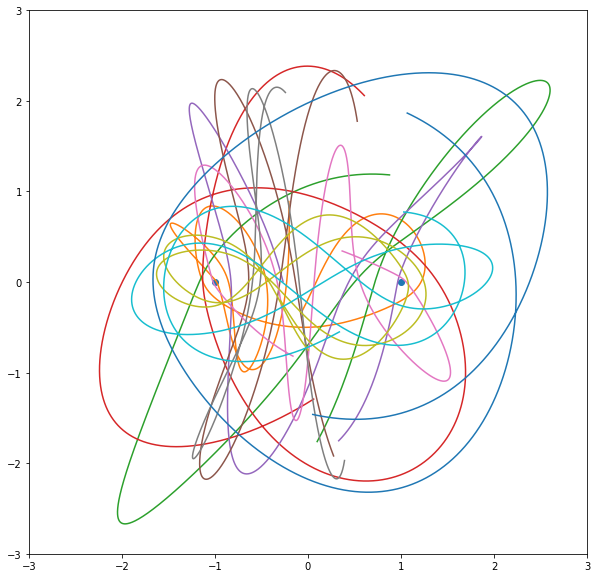

In [18]:
data = system(planetA,planetB,particles,b,dx,N)
plt.figure(figsize=(10,10))
plt.xlim((-3,3))
plt.ylim((-3,3))
plt.plot([planetA,planetB],[0,0],linestyle='none',marker='o')
for p in range(particles):
    plt.plot(*data[p])
plt.show()

This exhibits traits similar to what is expected, though a large source of error is due to the planets being point masses, and particles being able to get veeery close and accelerated very quickly. Normally this is possible with planets, though if the atmosphere damping is increaced above 1, then the particle is accelerated negatively and can accelerate it to escape speeds- thats the same error as setting the friction too high in an incline plane model and having the object accelerated like a bullet up the plane because of it. It would be neat to try to make a more rigorous model that included planet diameter to see how the dymanics of it changes, but because this is a planet scale, the difference may not be significant. If I could, I would add planet diameters, 3 dimensions, and planet movement to a model, and maybe use a dynamic plotting module to loot at it in timelapse. 